## 1. Come up with efficient data structures to represent both types of images: those generated by the microscope, and those generated by the dye sensor. These need not have the same representation; the only requirement is that they be compact and take as little storage space as possible. Explain why you picked the representation you did for each image type, and if possible estimate how much storage would be taken by the images. What is the worst-case storage size in bytes for each image representation you chose?


### <font color=green> Answer:</font>
### <font color=green> JPEGs have a smaller file size than other raster image file formats. However, JPEG is lossy compression. But for the microscope with high resolution, I think it is enough to get cancer result with JPEG. Since color JPEG images store 24 bits per pixel. </font>
### <font color=green> 100,000${\times}$100,000=1${\times}$10^6 pixels</font>
### <font color=green> 10^6${\times}$24=2.4${\times}$10^7 bits of information</font>
### <font color=green> 2.4${\times}$10^7/8=3${\times}$10^6 bytes=3MB/Image</font>
### <font color=green> If there are 1000 images, we need 3GB space to store these images
</font>

### <font color=green> Of course, for only contain black and white images, we could also use 2d array to represent them. </font>




## 2. Before the researchers give you real images to work with, you would like to test out any code you write. To this end, you would like to create “fake” simulated images and pretend they were captured by the microscope and the dye sensor. Using the data structures you chose in (1) above, write code to create such simulated images. Try and be as realistic in the generated images as possible.

### <font color=green> Answer:</font>
### <font color=green> For test and create fake simulated images, I create ten 1000$\times$1000 pixels JPEG with white background images</font>
### <font color=green>Since the microscope has zoomed in on each parasite so that the parasite occupies 25% or more of the total area of the image, I assumed it occupies 25%</font>

In [1]:
import numpy as np
from PIL import Image

for n in range(10):
    img = np.zeros([1000,1000,3],dtype=np.uint8)
    img.fill(255) 
    im_out = Image.fromarray(img)
    im_out.save('image_bg/image_bg%000d.jpeg' % n)

### <font color=green>Assume that each pixel of the image is either black if it is part of the blob, or white if it is the space surrounding the blob.</font>
### <font color=green> Create parasite_images folder to collect the blob in random location with 282radius(to make sure the area is about 25% of whole image and pilling with black.)</font>

In [2]:
# importing cv2
import cv2
# Reading an image in default mode
import glob

for filename in glob.glob("image_bg/*.jpeg"):
    #print(filename.split('/')[1])
    image = cv2.imread(filename) 
    # Center coordinates
    center_coordinates = (np.random.randint(282,718), np.random.randint(282,718))
    # Radius of circle
    radius = 282 #with 282 radius, it occupies25% for 1000*1000 image
    # Black color in BGR
    color = (0, 0, 0)
    # Using cv2.circle() method
    thickness = -1
    image = cv2.circle(image, center_coordinates, radius, color,thickness)
    im_out = Image.fromarray(image)
    
    im_out.save('parasite_images/'+filename.split('/')[1])


### <font color=green>Here show created simulated images.</font>

/var/folders/hr/12f0m5l5315098jl8vrjcxzh0000gn/T/ipykernel_21003/364107907.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


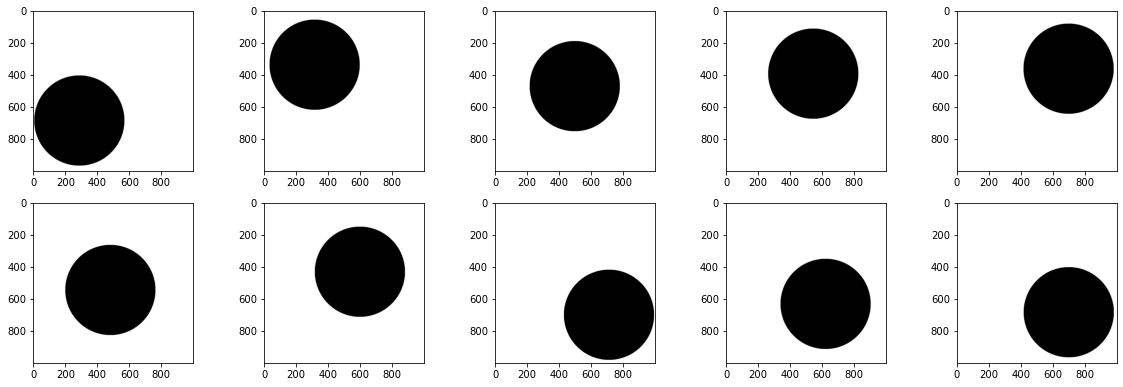

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('parasite_images/*.jpeg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

## 3. Using the simulated images generated by the code you wrote for (2) above as input, write a function to compute whether a parasite has cancer or not.

### <font color=green> Since a parasite is deemed to have cancer if the total amount of dye detected in its body exceeds 10% of the area occupied by the parasite in the image. </font>
### <font color=green> First, need to change the origin image into array.  </font>
### <font color=green> Then according what I wrote previously, I want to define a function to add dye in the parasite, and then calculate the proportion that total dye taken in the parasite.</font>
### <font color=green> set n in the function which could set the dye's number, and dye is distributed randomly in whole image </font>

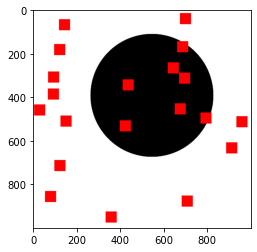

In [4]:
def add_dye(image,n):
    # Start coordinate, here (100, 50)
    # represents the top left corner of rectangle
    for i in range(n):
        x,y=np.random.randint(0,950),np.random.randint(0,950)
        start_point = (x,y)

        # Ending coordinate, here (125, 80)
        # represents the bottom right corner of rectangle
        end_point = (x+50, y+50)

        # Black color in BGR
        color = (255, 0, 0)

        # Line thickness of -1 px
        # Thickness of -1 will fill the entire shape
        thickness = -1

        # Using cv2.rectangle() method
        # Draw a rectangle of black color of thickness -1 px
        image = cv2.rectangle(image, start_point, end_point, color, thickness)
    return plt.imshow(image)
image = cv2.imread('parasite_images/image_bg0.jpeg')
add_dye(image,20)

### <font color=green> Store all parasite with 20 dyes randomly distributed into a new folder parasite_dye </font>

In [5]:
def store_add_dye(image,n):
    # Start coordinate, here (100, 50)
    # represents the top left corner of rectangle
    for i in range(n):
        x,y=np.random.randint(0,950),np.random.randint(0,950)
        start_point = (x,y)

        # Ending coordinate, here (125, 80)
        # represents the bottom right corner of rectangle
        end_point = (x+50, y+50)

        # Black color in BGR
        color = (255, 0, 0)

        # Line thickness of -1 px
        # Thickness of -1 will fill the entire shape
        thickness = -1

        # Using cv2.rectangle() method
        # Draw a rectangle of black color of thickness -1 px
        image = cv2.rectangle(image, start_point, end_point, color, thickness)
        im_out = Image.fromarray(image)
    return im_out

In [6]:
image_list=[]
for path in glob.glob("parasite_images/*.jpeg"):
    image = cv2.imread(path)
    image_list.append(store_add_dye(image,20))
for i in range(len(image_list)):
    image_list[i].save("parasite_dye/image%000d.jpeg" % i)

### <font color=green>Here show dyed images.</font>

/var/folders/hr/12f0m5l5315098jl8vrjcxzh0000gn/T/ipykernel_21003/433697902.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


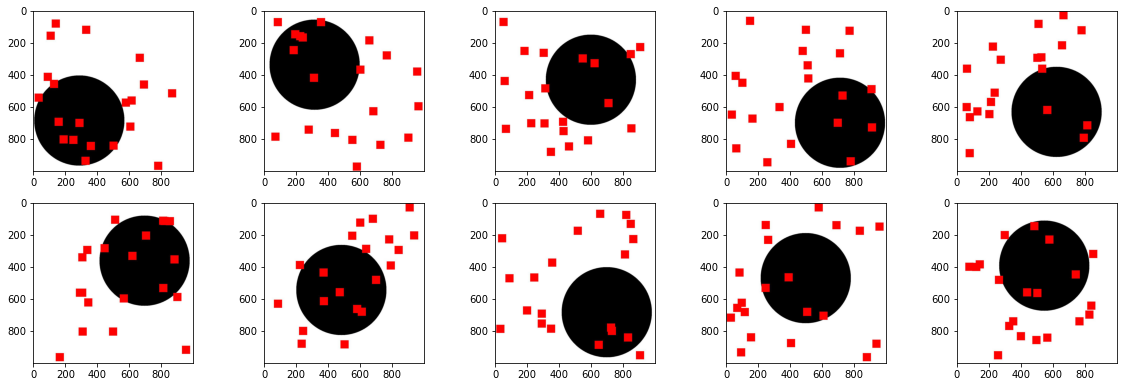

In [7]:
images = []
for img_path in glob.glob('parasite_dye/*.jpeg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

### <font color=green> To justify whether a parasite has cancer, only to see whether the dye occupied all black area more than 10 %. </font>
### <font color=green> Since here circle area is 282 and black is [0 0 0], white is [255 255 255], red is [255 0 0], count the number of first element equal to zero, we could get the parasite without dye area, then calculate whether it has a cancer. </font>

In [8]:
from numpy import asarray
circle_area=282*282*(np.pi)
#create parasite without dye number list for all images with dye:
def parasite_without_dye():
    parasite_without_dye=[]
    for img_path in glob.glob('parasite_dye/*.jpeg'):
        img = Image.open(img_path)
        numpydata = asarray(img)
        numpydata=numpydata.tolist()
        num=0
        for i in range(1000):
            for j in range(1000):
                if numpydata[i][j][0]==0:
                    num+=1

        parasite_without_dye.append(num) #the area for parasite without dye
    return parasite_without_dye


In [9]:
parasite_without_dye()

[219124,
 228451,
 233012,
 230095,
 232661,
 223966,
 225414,
 232338,
 231136,
 228717]

In [10]:
#pwd_list is the list of parasite_without_dye list
def if_cancer(pwd_list):
    circle_area=282*282*(np.pi)
    for element in pwd_list:
        result=(circle_area-element)/circle_area
        if result>0.1:
            print('The parasite %d has cancer.' % pwd_list.index(element))
        else:
            print('The parasite %d has no cancer.' % pwd_list.index(element))

In [11]:
pwd_list=parasite_without_dye()
if_cancer(pwd_list)

The parasite 0 has cancer.
The parasite 1 has no cancer.
The parasite 2 has no cancer.
The parasite 3 has no cancer.
The parasite 4 has no cancer.
The parasite 5 has cancer.
The parasite 6 has no cancer.
The parasite 7 has no cancer.
The parasite 8 has no cancer.
The parasite 9 has no cancer.


## 4. You give your code from (3) to the researchers, who run it and find that it is running too slowly for their liking. What can you do to improve the execution speed? Write the code to implement the fastest possible version you can think of for the function in (3).

### <font color=green> To improve the execution, I would like to reduce iterations and reduce two function to one. Here I print out the cancer_result_list. </font>

In [12]:
from numpy import asarray

#create parasite without dye number list for all images with dye:
def cancer_result_list():
    circle_area=282*282*(np.pi)
    parasite_without_dye=[]
    for img_path in glob.glob('parasite_dye/*.jpeg'):
        img = Image.open(img_path)
        numpydata = asarray(img)
        numpydata=numpydata.tolist()
        num=0
        for i in range(1000):
            for j in range(1000):
                if numpydata[i][j][0]==0:
                    num+=1

        parasite_without_dye.append(num) #the area for parasite without dye
    ca_list=[circle_area]*len(parasite_without_dye)
    cancer_list=(np.array(ca_list)-np.array(parasite_without_dye))/np.array(ca_list)
    return cancer_list


In [13]:
cancer_result_list()

array([0.12291465, 0.08558156, 0.0673253 , 0.07900114, 0.06873024,
       0.10353363, 0.09773773, 0.07002311, 0.07483434, 0.08451685])